In [3]:
import pandas as pd
df = pd.read_csv('data/wine_cleared.csv')

In [4]:
# 2.1 Вычислите наименьший балл за вино в датасете.

df['points'].min()

np.int64(80)

In [5]:
# 2.2 Вычислите наименьшую цену за бутылку в наборе данных.

df['price'].min()

np.float64(4.0)

In [6]:
import statistics

## <center> Среднее арифметическое <center>

Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

In [7]:
# 2.3 Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

round(statistics.mean(df['price']), 2)

35.36

In [8]:
# 2.4 Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.

meaned = df['price'].sum() / len(df['price'])
display(meaned)

np.float64(35.363389129985535)

## <center> Медиана <center>

Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

In [9]:
# 2.5 Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

round(statistics.median(df['price']), 2)

28.0

In [10]:
# 2.6 Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.

count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

median_low() возвращает меньшее из них;
median_high() возвращает большее из них.
Примечание. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

## <center> Мода <center>

Мода — самое часто встречающееся значение в числовом или нечисловом ряду данных.

Чаще всего мода используется в нечисловых рядах. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

In [11]:
# 2.7 Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics.
# Округлите значение до сотых.

round(statistics.mode(df['price']), 2)

35.36

Моду также можно вычислить при помощи statistics.multimode(). В случае наличия нескольких модовых (популярных значений) функция statistics.mode() вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.

In [12]:
# 2.8 Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.

mode = round(df['price'].value_counts().index[0], 2)
display(mode)

np.float64(35.36)

## <center> Корреляция <center>

***Корреляция*** — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Например, при взрослении у человека меняются его показатели: рост становится больше, риск сердечно-сосудистых заболеваний — выше.

Мерой связи величин, мерой корреляции является ***коэффициент корреляции***. Он может принимать значение от -1 до +1.

***Отрицательная корреляция***, коэффициент корреляции < 0 говорит об обратной связи между переменными. При обратной связи ***увеличение*** одной из величин ведёт к закономерному ***уменьшению*** другой (других) величин. 

Например, чем больше сумма активного долга, тем меньше шанс в одобрении кредита.

***Положительная корреляция***, коэффициент корреляции > 0 говорит о прямой связи между переменными. При прямой связи ***увеличение*** одной из величин ведёт к закономерному ***увеличению*** другой (других) величин. 

 Например, с увеличением возраста размер ноги человека увеличивается, и его рост увеличивается тоже.

Коэффициент корреляции = 0 говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

Понимание корреляции приводит нас к понятию ***мультиколлинеарности*** — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения. 

Например, сложилась ситуация, когда в датасете были обнаружены признаки с очень сильной корреляцией. Мы знаем, что мультиколлинеарность вредит такой модели, поэтому на этапе проектирования признаков можем объединить эту пару признаков в один или удалить из этой пары один — тот, что менее важен. Важность признаков мы оцениваем позже, на этапе отбора признаков.

In [13]:
# 3.3 Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.

# data.corr()

# Вычислите коэффициент корреляции между переменными в датасете винных обзоров.
# В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

round(df['points'].corr(df['price']), 6)

np.float64(0.402137)

Результатом функции df.corr() является матрица корреляции. 

***Матрица корреляции*** — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.

Данная матрица имеет значение 1 по главной диагонали, так как единица означает корреляцию признака с самим собой. Матрица является симметричной. 

## <center> Корреляция Пирсона <center>

Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками. 

Линейная взаимосвязь — вид связи между признаками, в котором изменение одного признака Х1 всегда приводит к изменению другого признака Х2 на величину, пропорциональную изменению Х1, в соответствии с правилом: Х2 = AX1 + b (уравнение прямой), где a и b — некоторые коэффициенты.

Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: «С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой». 

Например, с увеличением возраста заёмщика уменьшается количество дней просрочки по кредиту. 

## <center> Нормальное распределение <center>

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать нормальным распределением. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

Если признак является совокупностью очень редких событий, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot.

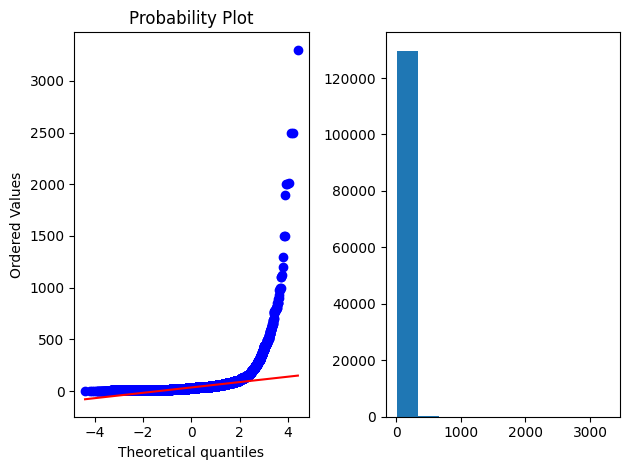

In [14]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

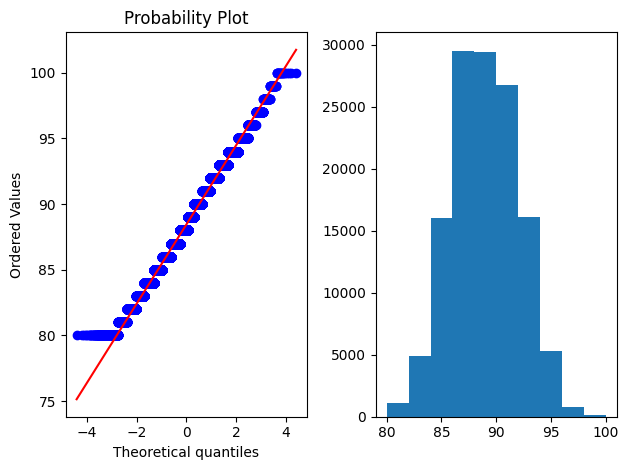

In [15]:
# 4.2 Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Ранговая корреляция — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. Ранги — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.

## <center> Корреляция Спирмена <center>

Коэффициент корреляции Спирмена используется для вычисления взаимосвязей между категориальными переменными.

In [17]:
# 5.1 Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

round(df['points'].corr(df['price'], method='spearman'), 2)

np.float64(0.58)

Например, в нашем случае один из признаков price распределён ненормально, связь между ними также не является линейной. Корреляция по Пирсону составляет 0.4, что говорит о слабой связи признаков. А корреляция по Спирмену составляет 0.58, что говорит о более сильной связи. 

Скорее всего, корреляция Спирмена в данном случае будет более верным вариантом, но для точного ответа нам необходимо будет удовлетворить условиям корреляции Спирмена или корреляции Пирсона. Для этого будут необходимы преобразования, которые мы изучим в следующих модулях EDA.

Так же, как и коэффициент Пирсона, коэффициент Спирмена распределён [-1; 1] с такой же интерпретацией силы связи, рассмотренной нами в предыдущих юнитах.

Для ранговой корреляции существует ещё один метод расчёта — корреляция Кендалла.

## <center> Корреляция Кендалла <center>

Так же, как и корреляция Спирмена, корреляция Кендала предусмотрена для нахождения взаимосвязей между категориальными переменными. Для расчёта коэффициента корреляции Кендалла необходимо передать в изученный нами метод df.corr() аргумент method = 'kendall'. 

In [18]:
# 5.2 Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

round(df['points'].corr(df['price'], method='kendall'), 2)

np.float64(0.43)

## <center> Корреляция Мэтьюса <center>

Кроме этого, существует корреляция Мэтьюса — мера силы связи между бинарными переменными.

В df.corr() нет расчёта для корреляции Мэтьюса, но мы можем воспользоваться библиотекой scikit-learn и её функцией matthews_corrcoef() для расчёта коэффициента корреляции Мэтьюса.

In [22]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

round(matthews_corrcoef(x, y), 2) # рассчитаем коэффициент корреляции Мэтьюса

-0.33